# Spain Elections Sentiment Analysis

## Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

## Load Datasets

In [2]:
result0204 = pd.read_csv('D:/Usuarios/rhaps/Documents/GitHub/Data-Science/Datasets/spain_elections/0204.csv', encoding="latin1")
result0304 = pd.read_csv('D:/Usuarios/rhaps/Documents/GitHub/Data-Science/Datasets/spain_elections/0304.csv', encoding="latin1")
result0404 = pd.read_csv('D:/Usuarios/rhaps/Documents/GitHub/Data-Science/Datasets/spain_elections/0404.csv', encoding="latin1")
result0504 = pd.read_csv('D:/Usuarios/rhaps/Documents/GitHub/Data-Science/Datasets/spain_elections/0504.csv', encoding="latin1")
result0604 = pd.read_csv('D:/Usuarios/rhaps/Documents/GitHub/Data-Science/Datasets/spain_elections/0604.csv', encoding="latin1")
result0704 = pd.read_csv('D:/Usuarios/rhaps/Documents/GitHub/Data-Science/Datasets/spain_elections/0704.csv', encoding="latin1")
result1004 = pd.read_csv('D:/Usuarios/rhaps/Documents/GitHub/Data-Science/Datasets/spain_elections/1004.csv', encoding="latin1")

In [3]:
result = pd.concat([result0204, result0304, result0404, result0504, result0604, result0704, result1004])

## Exploration

In [4]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320415 entries, 0 to 47061
Data columns (total 17 columns):
Unnamed: 0       320415 non-null int64
text             320415 non-null object
favorited        320415 non-null bool
favoriteCount    320415 non-null int64
replyToSN        11931 non-null object
created          320415 non-null object
truncated        320415 non-null bool
replyToSID       9824 non-null float64
id               320415 non-null int64
replyToUID       11931 non-null float64
statusSource     320415 non-null object
screenName       320415 non-null object
retweetCount     320415 non-null int64
isRetweet        320415 non-null bool
retweeted        320415 non-null bool
longitude        77 non-null float64
latitude         77 non-null float64
dtypes: bool(4), float64(4), int64(4), object(5)
memory usage: 35.4+ MB


In [8]:
result.head(3)

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,1,RT @FmartineL: Reparar a las vctimas de la gue...,False,0,NaN,2019-04-02 23:34:23,False,NaN,1113223180431372289,NaN,"<a href=""http://twitter.com/download/android"" ...",muniesalap,90,True,False,NaN,NaN
1,2,RT @POCHY1971: Esperando a encontrar algo sobr...,False,0,NaN,2019-04-02 23:19:04,False,NaN,1113219324632883200,NaN,"<a href=""http://twitter.com/download/android"" ...",Tarrega20049572,34,True,False,NaN,NaN
2,3,RT @FmartineL: La nica garanta que tiene este ...,False,0,NaN,2019-04-02 23:06:03,False,NaN,1113216049070202880,NaN,"<a href=""http://twitter.com/download/android"" ...",coboortiz99,55,True,False,NaN,NaN


In [13]:
pd.crosstab(result.favorited, result.favorited)

favorited,False
favorited,
False,320415


The feature _favorite_ doesn't have values in True.

One idea is to make a new feature which has the sum of registers between _retweetCount_ and _favoriteCount_.

In [5]:
result['feeling'] = pd.Series(result.retweetCount + result.favoriteCount)

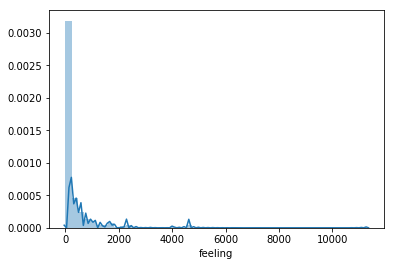

In [24]:
sns.distplot(result.feeling)

I will make a category for each hashtag

In [6]:
categories = ["#votoutilPabloCasado", "#votoPP", "#110compromisosPSOE", "#Sanchismo", "#Politicautil", "#JuntosSomosImparables",
              "#ciudadanos", "#LaHistoriaLaEscribesTu", "#Podemos", "#UnidasPodemos", "#EspañaViva", "#VOX", 
              "#CatalunaPorEspaña", "#LlibertatPresosPolitics", "#JoAcuso", "#28A", "#28Abril", "#EspanaVaciada",
              "#hazquepase", "#HazQuePaseYNoVuelva", "#HazQueNoPase", "#SanchezMentiroso", "#porEspaña", 
              "#EleccionesGenerales28Abril", "#Casado", "#AlbertRivera", "#PedroSanchez", "#pabloIglesias",
              "#Abascal", "#AbascalPresidente", "#jonqueras", "#ObjetivoRivera", "#VamosCiudadanos", 
              "#CaféAbascal"
]

In [7]:
result2 =  result.copy()
for i in categories:
    result2[i] = False

In [8]:
result2["focus"] = ""
for i in categories:
    result2.loc[result2['text'].str.contains(i), i] = True   
    result2.loc[result2['text'].str.contains(i), "focus"] = i 

In [9]:
pd.crosstab(result2.loc[:,"#Casado"], 
            result2.loc[:,"#Casado"])

#Casado,False,True
#Casado,,
False,317905,0
True,0,2510


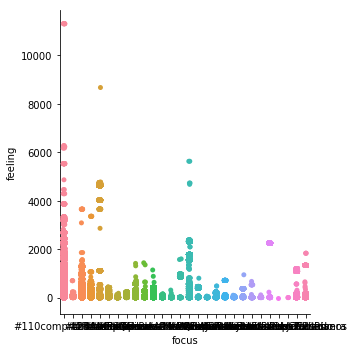

In [100]:
sns.catplot(y='feeling', x='focus', data=result2)

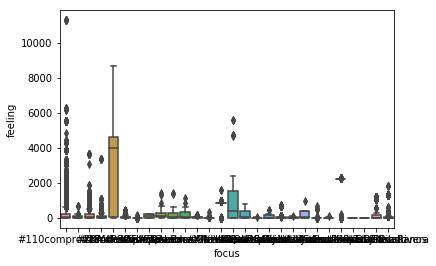

In [102]:
sns.boxplot(y='feeling', x='focus', data=result2)

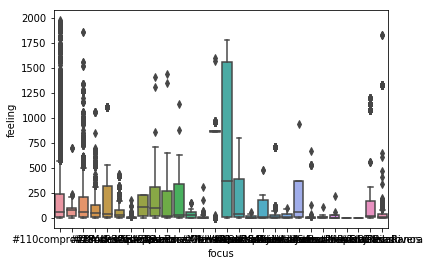

In [108]:
sns.boxplot(y='feeling', x='focus', data=result2[result2.feeling<=2000])

I'm going to take a set registers, especially, which are in the tail of less feeling and the top of high feeling.

In [14]:
less_feeling = result2[result2.feeling <=250].copy()
high_feeling = result2[result2.feeling > 250].copy()

In [25]:
high_feeling.text.values[14]

'RT @sanchezcastejon: Los socialistas tenemos 110 medidas de futuro. Otros slo tienen una idea: llevar a Espaa al pasado, a la involucin.'

## Number of Words

In [12]:
result2['word_count'] = result2['text'].apply(lambda x: len(str(x).split(" ")))
result2[["text", "word_count"]].head(5)

,text,word_count
0,RT @FmartineL: Reparar a las vctimas de la gue...,27
1,RT @POCHY1971: Esperando a encontrar algo sobr...,17
2,RT @FmartineL: La nica garanta que tiene este ...,25
3,RT @gomezdcelis: Tienes el poder de cambiar la...,23
4,RT @gomezdcelis: Tienes el poder de cambiar la...,23


## 